04. DBSCAN : 초승달 모양의 데이터 분포를 생성

In [1]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_samples= 1000
np.random.seed(3)

In [3]:
X, y = make_moons(n_samples=n_samples, noise=.05) 
#noise: 잡음의 크기. 0이면 정확한 반원을 이룸

In [4]:
df= pd.DataFrame(X)
df

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702
...,...,...
995,1.935958,0.222818
996,0.344545,-0.306671
997,0.014489,0.976399
998,0.473582,-0.383815


<Axes: xlabel='0', ylabel='1'>

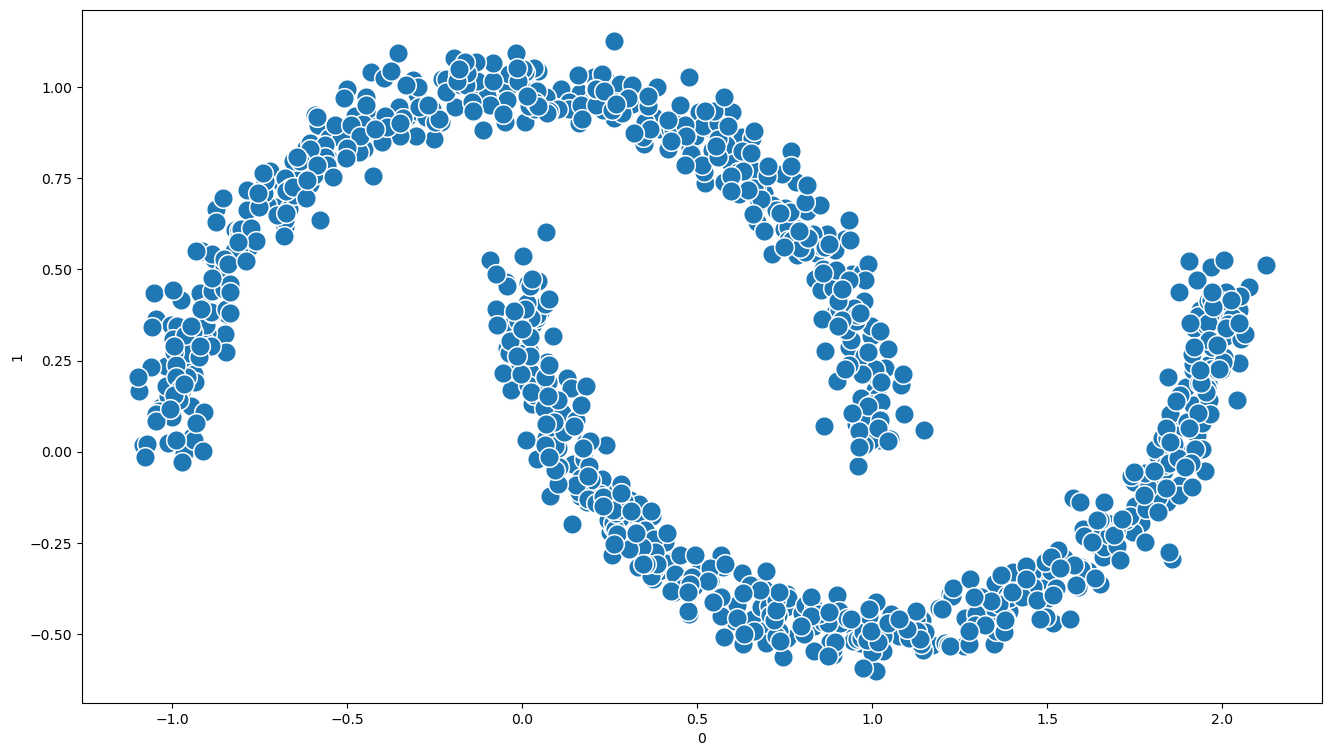

In [5]:
#시각화
plt.figure(figsize=(16,9))
sns.scatterplot(x=df[0],
                   y= df[1],
                   marker ='o', s =200)

In [6]:
from sklearn.cluster import KMeans

In [7]:
#k-means 모델 학습
model = KMeans(n_clusters=2, random_state =123)
model.fit(df)

#cluster 라벨링
df['kmeans_label'] = model.predict(df)

#각 군집의 중심점
centers = model.cluster_centers_

C:\Users\semin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
df

,0,1,kmeans_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,1
...,...,...,...
995,1.935958,0.222818,0
996,0.344545,-0.306671,0
997,0.014489,0.976399,1
998,0.473582,-0.383815,0


<Axes: xlabel='0', ylabel='1'>

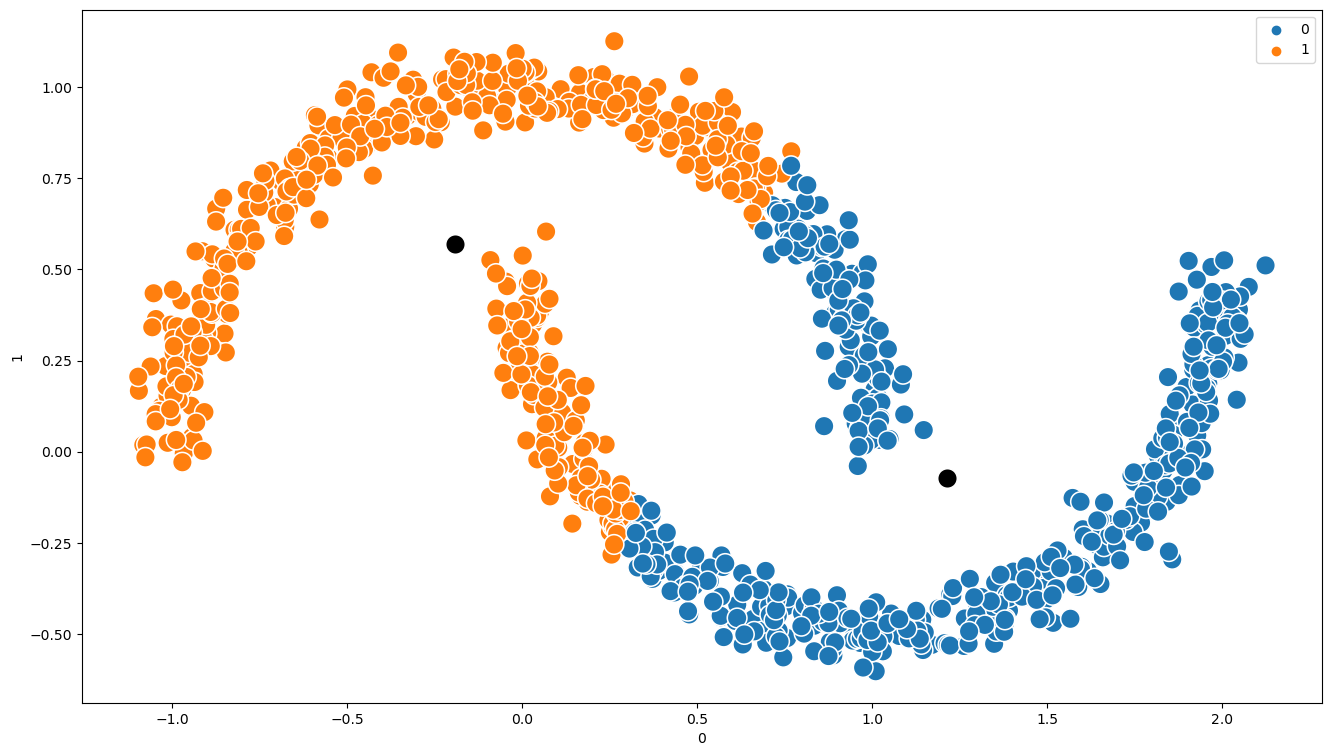

In [9]:
#클러스터링 결과 시각화
plt.figure(figsize=(16,9))

sns.scatterplot(x=df[0], y=df[1],
                   hue=df['kmeans_label'], s=200)
sns.scatterplot(x=centers[:,0], #centroid 표시
                    y=centers[:,1],
                   color= 'black',
                    s=200)

In [10]:
centers

array([[ 1.2125595 , -0.07216713],
       [-0.19369026,  0.56892671]])

In [11]:
df = df.drop(columns = ['kmeans_label'], axis =1)
df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


In [12]:
df

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702
...,...,...
995,1.935958,0.222818
996,0.344545,-0.306671
997,0.014489,0.976399
998,0.473582,-0.383815


In [13]:
from sklearn.cluster import DBSCAN

In [14]:
#최소 데이터 개수는 5
#반경은 0.1
#클러스터링 된 결과를 확인 할 때는 predict() 대신 labels_

eps =0.1 #반경
min_samples =5 #최소 데이터 개수 

#DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

<Axes: xlabel='0', ylabel='1'>

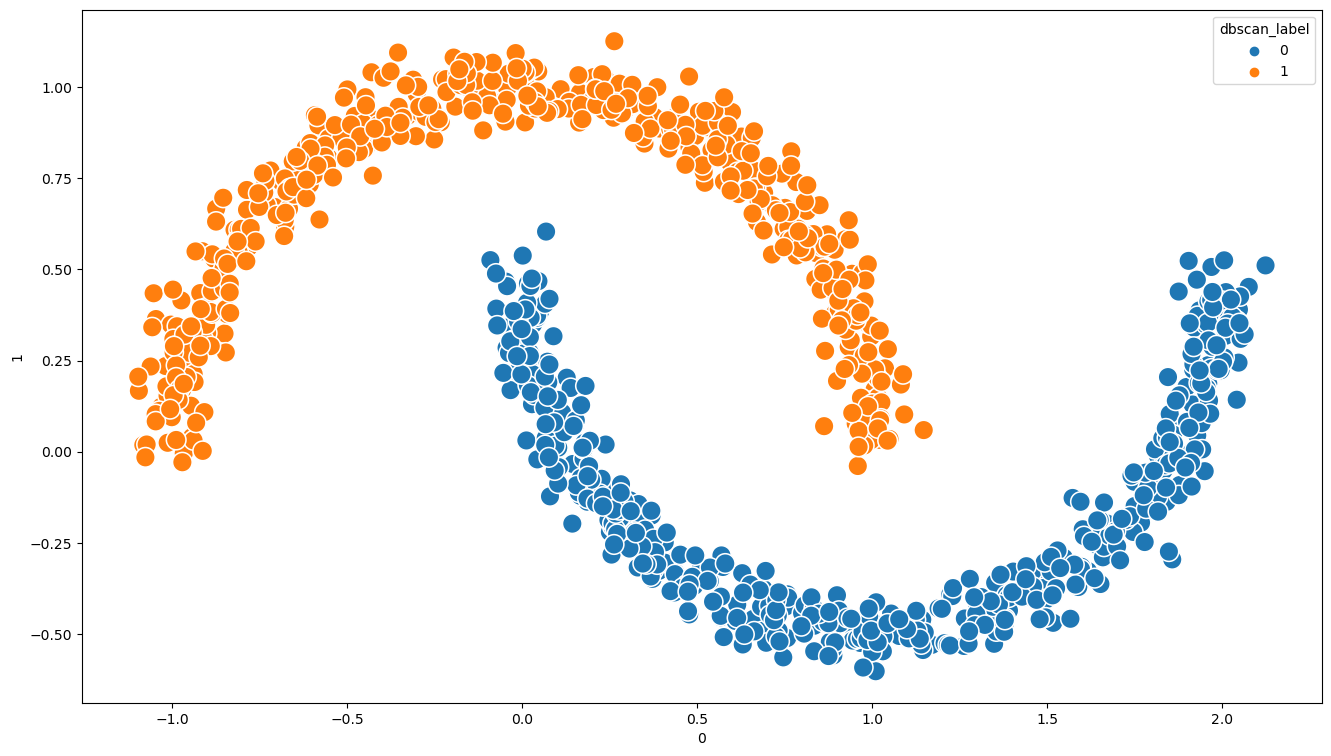

In [15]:
# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

In [16]:
df

,0,1,dbscan_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,0
...,...,...,...
995,1.935958,0.222818,0
996,0.344545,-0.306671,0
997,0.014489,0.976399,1
998,0.473582,-0.383815,0
